Visualisation of Analysed Data

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
import joblib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Define file paths
model_filename = "/content/drive/MyDrive/DS - Stock Market Sentiment Analysis/stock_sentiment_model.pkl"
vectorizer_filename = "/content/drive/MyDrive/DS - Stock Market Sentiment Analysis/tfidf_vectorizer.pkl"

model = joblib.load(model_filename)
vectorizer = joblib.load(vectorizer_filename)

new_texts = [
    "Stock prices are surging today, a great opportunity to invest!",
    "The market is crashing badly, investors should be cautious.",
    "Tech stocks are performing well amid positive earnings reports.",
    "Investors are worried about inflation and interest rates.",
    "The stock market is showing strong bullish signs today!"
]

for text, sentiment in zip(new_texts, predictions):
    sentiment_label = "Positive" if sentiment == 1 else "Negative"
    print(f"Text: {text}\nPredicted Sentiment: {sentiment_label}\n")

Text: Stock prices are surging today, a great opportunity to invest!
Predicted Sentiment: Positive

Text: The market is crashing badly, investors should be cautious.
Predicted Sentiment: Positive

Text: Tech stocks are performing well amid positive earnings reports.
Predicted Sentiment: Positive

Text: Investors are worried about inflation and interest rates.
Predicted Sentiment: Positive

Text: The stock market is showing strong bullish signs today!
Predicted Sentiment: Positive



<ipython-input-35-7cc7474764b8>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Negative", "Positive"], y=[sentiment_counts.get(0, 0), sentiment_counts.get(1, 0)], palette=["red", "green"])


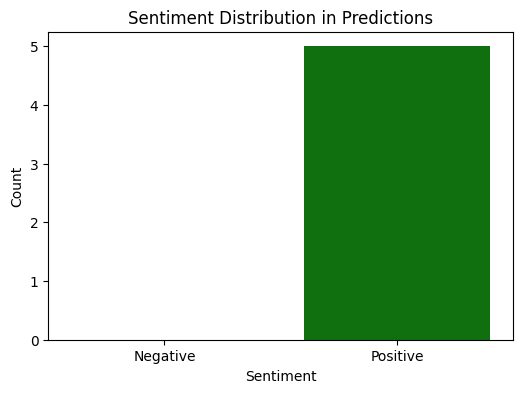

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of each sentiment
unique, counts = np.unique(predictions, return_counts=True)
sentiment_counts = dict(zip(unique, counts))

# Plot bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x=["Negative", "Positive"], y=[sentiment_counts.get(0, 0), sentiment_counts.get(1, 0)], palette=["red", "green"])
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Distribution in Predictions")
plt.show()

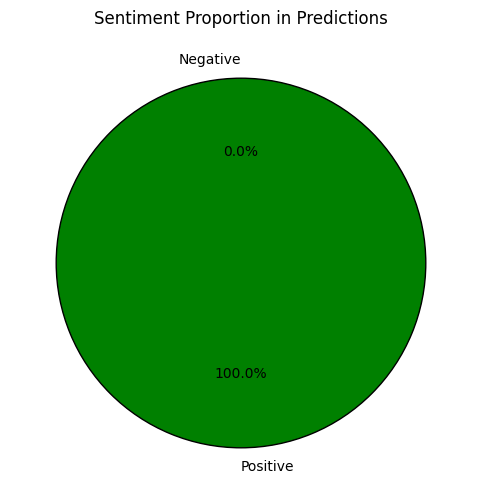

In [36]:
import matplotlib.pyplot as plt

# Labels and counts
labels = ["Negative", "Positive"]
sizes = [sentiment_counts.get(0, 0), sentiment_counts.get(1, 0)]
colors = ["red", "green"]

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title("Sentiment Proportion in Predictions")
plt.show()

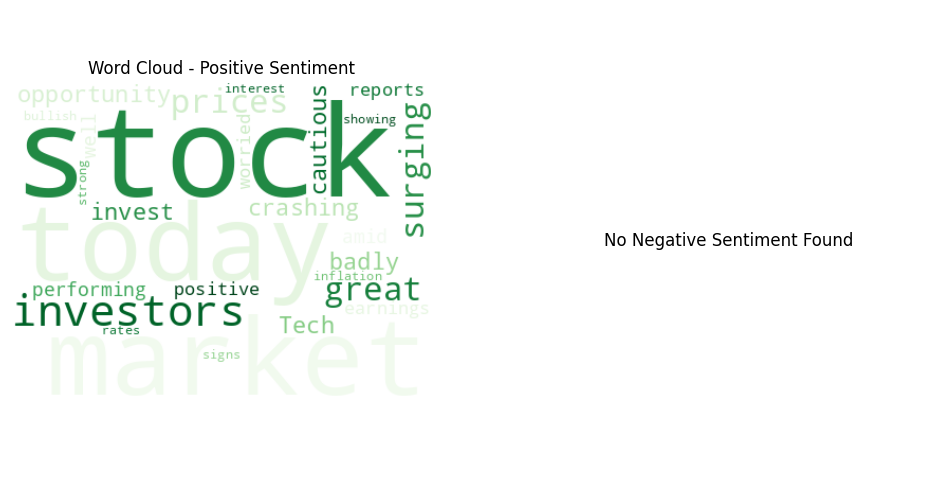

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

positive_words = " ".join([new_texts[i] for i in range(len(predictions)) if predictions[i] == 1])
negative_words = " ".join([new_texts[i] for i in range(len(predictions)) if predictions[i] == 0])

plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
if positive_words.strip():
    wordcloud_pos = WordCloud(width=400, height=300, background_color='white', colormap='Greens').generate(positive_words)
    plt.imshow(wordcloud_pos, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud - Positive Sentiment")
else:
    plt.text(0.5, 0.5, "No Positive Sentiment Found", fontsize=12, ha='center', va='center')
    plt.axis("off")


plt.subplot(1, 2, 2)
if negative_words.strip():
    wordcloud_neg = WordCloud(width=400, height=300, background_color='white', colormap='Reds').generate(negative_words)
    plt.imshow(wordcloud_neg, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud - Negative Sentiment")
else:
    plt.text(0.5, 0.5, "No Negative Sentiment Found", fontsize=12, ha='center', va='center')
    plt.axis("off")

plt.show()